In [1]:
import pandas as pd

In [2]:
# importing relevant packages for cleaning and modeling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For our modeling steps
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Read in features csv
df = pd.read_csv('training_set_features.csv')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
df.employment_status.value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

In [6]:
# Read in target csv
df1 = pd.read_csv('training_set_labels.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [7]:
df1.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [8]:
df1.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [9]:
df1.seasonal_vaccine.value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [10]:
# Merge the dataframes on respondent id
flu_df = df.merge(df1, how='left', left_on='respondent_id', right_on='respondent_id')

In [11]:
flu_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [13]:
flu_df.sex.value_counts(normalize=True)

Female    0.593777
Male      0.406223
Name: sex, dtype: float64

In [13]:
flu_df.groupby(['race']).size()

race
Black                 2118
Hispanic              1755
Other or Multiple     1612
White                21222
dtype: int64

In [14]:
flu_df.groupby(['race', 'age_group', 'seasonal_vaccine']).size()

race               age_group      seasonal_vaccine
Black              18 - 34 Years  0                    393
                                  1                     99
                   35 - 44 Years  0                    245
                                  1                     92
                   45 - 54 Years  0                    289
                                  1                    134
                   55 - 64 Years  0                    250
                                  1                    166
                   65+ Years      0                    200
                                  1                    250
Hispanic           18 - 34 Years  0                    512
                                  1                    155
                   35 - 44 Years  0                    262
                                  1                    117
                   45 - 54 Years  0                    203
                                  1                    111
     

In [15]:
flu_df.race.value_counts(normalize=True)

White                0.794623
Black                0.079305
Hispanic             0.065713
Other or Multiple    0.060359
Name: race, dtype: float64

In [16]:
flu_df.groupby(['race', 'sex']).size()

race               sex   
Black              Female     1356
                   Male        762
Hispanic           Female      986
                   Male        769
Other or Multiple  Female      866
                   Male        746
White              Female    12650
                   Male       8572
dtype: int64

In [17]:
flu_df[['race', 'sex', 'income_poverty']].groupby(['race', 'sex']).size()

race               sex   
Black              Female     1356
                   Male        762
Hispanic           Female      986
                   Male        769
Other or Multiple  Female      866
                   Male        746
White              Female    12650
                   Male       8572
dtype: int64

In [18]:
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [19]:
# Identify and removing columns which are not relevant for our analysis
not_relevant = [
    'h1n1_concern',
    'h1n1_knowledge',
    'doctor_recc_h1n1',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'employment_industry',
    'employment_occupation',
    'hhs_geo_region',
    'census_msa',
    'health_insurance',
    'respondent_id',
    'h1n1_vaccine'
]

seasonal_df = flu_df.drop(not_relevant, axis=1)

In [20]:
seasonal_df.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,seasonal_vaccine
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,0.0,0.0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,0.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,2.0,0.0,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,0.0,0.0,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,1.0,0.0,0


In [21]:
seasonal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   doctor_recc_seasonal         24547 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  opinion_seas_vacc_effective  26245 non-null  float64
 12  opinion_seas_risk            26193 non-null  float64
 13  opinion_seas_sic

In [22]:
# Identifying predictor and target variables
X = seasonal_df.drop('seasonal_vaccine', axis=1)
y = seasonal_df['seasonal_vaccine']

In [23]:
# Creating a list of columns which contain any null values
col_missing = [col for col in seasonal_df.columns if seasonal_df[col].isnull().any()]
col_missing

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'education',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'household_adults',
 'household_children']

In [24]:
# Perform a train test split on the X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
15654,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,65+ Years,< 12 Years,White,Male,Below Poverty,Married,Own,Not in Labor Force,1.0,0.0
14559,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,45 - 54 Years,12 Years,Hispanic,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,0.0,0.0
13752,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,1.0,0.0
21985,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,...,65+ Years,< 12 Years,Other or Multiple,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,1.0,0.0
18196,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,18 - 34 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,1.0,3.0
17289,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,35 - 44 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",NaN,Own,Employed,0.0,1.0
5192,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,1.0,0.0
12172,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,0.0,0.0


In [25]:
# Instantiating a SimpleImputer object with a 'most frequent' fill strategy
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [26]:
# Fit the imputer on the columns with missing data
imp = imp.fit(X_train[col_missing])

c:\Users\rredd\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\Users\rredd\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False 

c:\Users\rredd\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\Users\rredd\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False 

In [27]:
# Transform the X_train and X_test data using the imputer
X_train[col_missing] = imp.transform(X_train[col_missing])
X_test[col_missing] = imp.transform(X_test[col_missing])

<ipython-input-27-97c2fec25af4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col_missing] = imp.transform(X_train[col_missing])
c:\Users\rredd\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-27-97c2fec25af4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 15654 to 235
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    20030 non-null  float64
 1   behavioral_avoidance         20030 non-null  float64
 2   behavioral_face_mask         20030 non-null  float64
 3   behavioral_wash_hands        20030 non-null  float64
 4   behavioral_large_gatherings  20030 non-null  float64
 5   behavioral_outside_home      20030 non-null  float64
 6   behavioral_touch_face        20030 non-null  float64
 7   doctor_recc_seasonal         20030 non-null  float64
 8   chronic_med_condition        20030 non-null  float64
 9   child_under_6_months         20030 non-null  float64
 10  health_worker                20030 non-null  float64
 11  opinion_seas_vacc_effective  20030 non-null  float64
 12  opinion_seas_risk            20030 non-null  float64
 13  opinion_seas_s

In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6677 entries, 25567 to 1756
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    6677 non-null   float64
 1   behavioral_avoidance         6677 non-null   float64
 2   behavioral_face_mask         6677 non-null   float64
 3   behavioral_wash_hands        6677 non-null   float64
 4   behavioral_large_gatherings  6677 non-null   float64
 5   behavioral_outside_home      6677 non-null   float64
 6   behavioral_touch_face        6677 non-null   float64
 7   doctor_recc_seasonal         6677 non-null   float64
 8   chronic_med_condition        6677 non-null   float64
 9   child_under_6_months         6677 non-null   float64
 10  health_worker                6677 non-null   float64
 11  opinion_seas_vacc_effective  6677 non-null   float64
 12  opinion_seas_risk            6677 non-null   float64
 13  opinion_seas_s

In [30]:
# Import OneHotEncoder and identify columns which need to be encoded and which do not
from sklearn.preprocessing import OneHotEncoder
col_encode = [
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'age_group',
    'education',
    'race',
    'sex',
    'income_poverty',
    'marital_status',
    'rent_or_own',
    'employment_status',
    'household_adults',
    'household_children'
]

col_no_encode = [
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face',
    'doctor_recc_seasonal',
    'chronic_med_condition',
    'child_under_6_months',
    'health_worker',

]

# Create new training and test dataframes with columns which do not need encoding
X_train_binary = X_train[col_no_encode]
X_test_binary = X_test[col_no_encode]

In [31]:
# Create new train and test dataframes with columns which need to be encoded
df_train_encode = X_train[col_encode]
df_test_encode = X_test[col_encode]

# Instantiate a OneHotEncoder object and fit onto the new train dataframe which needs to be encoded
ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(df_train_encode)


OneHotEncoder(drop='first', sparse=False)

In [32]:
# Observe the new feature names created
ohe.get_feature_names()

array(['x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x1_2.0', 'x1_3.0',
       'x1_4.0', 'x1_5.0', 'x2_35 - 44 Years', 'x2_45 - 54 Years',
       'x2_55 - 64 Years', 'x2_65+ Years', 'x3_< 12 Years',
       'x3_College Graduate', 'x3_Some College', 'x4_Hispanic',
       'x4_Other or Multiple', 'x4_White', 'x5_Male', 'x6_> $75,000',
       'x6_Below Poverty', 'x7_Not Married', 'x8_Rent',
       'x9_Not in Labor Force', 'x9_Unemployed', 'x10_1.0', 'x10_2.0',
       'x10_3.0', 'x11_1.0', 'x11_2.0', 'x11_3.0'], dtype=object)

In [33]:
# Transform the train and test dataframes on the OneHotEncoder object
train_trans_data = ohe.transform(df_train_encode)
test_trans_data = ohe.transform(df_test_encode)

# Create new encoded dataframes using the above arrays
X_train_encode = pd.DataFrame(train_trans_data, index=X_train.index)
X_test_encode = pd.DataFrame(test_trans_data, index=X_test.index)

# Rename the columns using the OneHotEncoder feature names created
X_train_encode.columns = ohe.get_feature_names()
X_test_encode.columns = ohe.get_feature_names()


In [34]:
# Concatenate the encoded dataframes onto the data which did not need encoding
X_train_encoded_binary = pd.concat([X_train_binary, X_train_encode], axis=1)
X_test_encoded_binary = pd.concat([X_test_binary, X_test_encode], axis=1)

In [35]:
X_train_encoded_binary

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,x7_Not Married,x8_Rent,x9_Not in Labor Force,x9_Unemployed,x10_1.0,x10_2.0,x10_3.0,x11_1.0,x11_2.0,x11_3.0
15654,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14559,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13752,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21985,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18196,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17289,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5192,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12172,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_train_encoded_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 15654 to 235
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    20030 non-null  float64
 1   behavioral_avoidance         20030 non-null  float64
 2   behavioral_face_mask         20030 non-null  float64
 3   behavioral_wash_hands        20030 non-null  float64
 4   behavioral_large_gatherings  20030 non-null  float64
 5   behavioral_outside_home      20030 non-null  float64
 6   behavioral_touch_face        20030 non-null  float64
 7   doctor_recc_seasonal         20030 non-null  float64
 8   chronic_med_condition        20030 non-null  float64
 9   child_under_6_months         20030 non-null  float64
 10  health_worker                20030 non-null  float64
 11  x0_2.0                       20030 non-null  float64
 12  x0_3.0                       20030 non-null  float64
 13  x0_4.0        

In [37]:
# Importing metrics for model evaluation

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve

In [38]:
# Importing the DummyClassifier class to run the baseline model
from sklearn.dummy import DummyClassifier

# Instantiate a DummyClassifier object and fit on the data
baseline_model = DummyClassifier()
baseline_model.fit(X_train_encoded_binary, y_train)

# Run a prediction on the test set and get a precision score as a baseline
baseline_pred = baseline_model.predict(X_test_encoded_binary)
baseline_precision = precision_score(y_test, baseline_pred)
print(baseline_precision)
print(baseline_model.score(X_train_encoded_binary, y_train))

0.44437299035369776
0.500299550673989


c:\Users\rredd\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [39]:
# Instantiate a LogisticRegression object and fit on the training data
cred_model = LogisticRegression(random_state=1)
cred_model.fit(X_train_encoded_binary, y_train)

LogisticRegression(random_state=1)

In [40]:
# Running a cross validation on the training data
scores_simple = cross_validate(
                    cred_model, X_train_encoded_binary, y_train, cv=4, 
                    return_train_score=True
)
print(f"""train scores: {scores_simple['train_score']},
      test scores: {scores_simple['test_score']}""")

train scores: [0.77060312 0.77459726 0.76888771 0.77261532],
      test scores: [0.77096645 0.76377796 0.77910925 0.76772518]


In [41]:
# Checking the accuracy of the model using the training data
cred_model.score(X_train_encoded_binary, y_train)

0.771792311532701

In [42]:
# Check the model accuracy on the test data
cred_model.score(X_test_encoded_binary, y_test)

0.7852328890220158

In [43]:
# Run a prediction on the test set and create a confusion matrix
y_pred = cred_model.predict(X_test_encoded_binary)
cm_1 = confusion_matrix(y_test, y_pred)
cm_1

array([[2983,  656],
       [ 778, 2260]], dtype=int64)

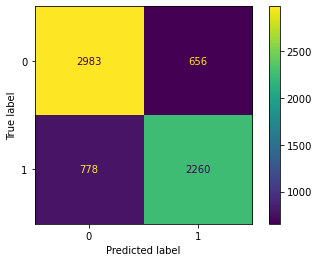

In [44]:
# Plotting the confusion matrix
plot_confusion_matrix(cred_model, X_test_encoded_binary, y_test)

In [45]:
# Print the metrics on the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      3639
           1       0.78      0.74      0.76      3038

    accuracy                           0.79      6677
   macro avg       0.78      0.78      0.78      6677
weighted avg       0.78      0.79      0.78      6677



In [46]:
# Checking the precision score on the test dat
log_reg_prec = precision_score(y_test, y_pred)
log_reg_prec

0.7750342935528121

In [47]:
# Getting the predicted probabilities of test data
y_prob = cred_model.predict_proba(X_test_encoded_binary)
y_prob[:5]

array([[0.15234256, 0.84765744],
       [0.91096018, 0.08903982],
       [0.06579798, 0.93420202],
       [0.08187596, 0.91812404],
       [0.15908068, 0.84091932]])

In [48]:
y_pred[:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [49]:
# Checking the roc auc score of the cred model
y_hat_hd = y_prob[:, 1]

roc_auc_score(y_test, y_hat_hd)

0.8554110605229247

In [133]:
coefficients = cred_model.coef_[0]

# Create a pandas Series with coefficients and column names as index
feature_coefficients = pd.Series(coefficients, index=X_train_encoded_binary.columns)
feature_coefficients

behavioral_antiviral_meds      0.070362
behavioral_avoidance          -0.093984
behavioral_face_mask          -0.034392
behavioral_wash_hands          0.086048
behavioral_large_gatherings   -0.064254
behavioral_outside_home       -0.046833
behavioral_touch_face          0.240838
doctor_recc_seasonal           1.282717
chronic_med_condition          0.195500
child_under_6_months           0.052640
health_worker                  0.895701
x0_2.0                        -0.313624
x0_3.0                         0.353404
x0_4.0                         0.652930
x0_5.0                         1.622626
x1_2.0                         0.696134
x1_3.0                         1.294182
x1_4.0                         1.535511
x1_5.0                         1.867863
x2_35 - 44 Years               0.199615
x2_45 - 54 Years               0.371236
x2_55 - 64 Years               0.679982
x2_65+ Years                   1.500558
x3_< 12 Years                 -0.218725
x3_College Graduate            0.329314


In [153]:
# Checking the how much more likely the 65+ year old group is to get the vaccine compared to the 18-34 group
np.exp(1.500558)

4.484190550687425

In [135]:
# Getting the coefficients with positive coefficients
features_positive = feature_coefficients[feature_coefficients > 0]
features_positive.index

Index(['behavioral_antiviral_meds', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'x0_3.0', 'x0_4.0', 'x0_5.0', 'x1_2.0', 'x1_3.0', 'x1_4.0', 'x1_5.0',
       'x2_35 - 44 Years', 'x2_45 - 54 Years', 'x2_55 - 64 Years',
       'x2_65+ Years', 'x3_College Graduate', 'x3_Some College', 'x4_Hispanic',
       'x4_Other or Multiple', 'x4_White', 'x6_> $75,000',
       'x9_Not in Labor Force'],
      dtype='object')

In [149]:
features_positive

behavioral_antiviral_meds    0.070362
behavioral_wash_hands        0.086048
behavioral_touch_face        0.240838
doctor_recc_seasonal         1.282717
chronic_med_condition        0.195500
child_under_6_months         0.052640
health_worker                0.895701
x0_3.0                       0.353404
x0_4.0                       0.652930
x0_5.0                       1.622626
x1_2.0                       0.696134
x1_3.0                       1.294182
x1_4.0                       1.535511
x1_5.0                       1.867863
x2_35 - 44 Years             0.199615
x2_45 - 54 Years             0.371236
x2_55 - 64 Years             0.679982
x2_65+ Years                 1.500558
x3_College Graduate          0.329314
x3_Some College              0.123178
x4_Hispanic                  0.231441
x4_Other or Multiple         0.518263
x4_White                     0.425472
x6_> $75,000                 0.204161
x9_Not in Labor Force        0.104371
dtype: float64

In [50]:
# Instantiate a DecisionTreeClassifier object
flu_dt = DecisionTreeClassifier(random_state=1)

In [51]:
# Fit the object on the training data
flu_dt.fit(X_train_encoded_binary, y_train)

DecisionTreeClassifier(random_state=1)

In [52]:
# Run a prediction on the test data
y_dt_pred = flu_dt.predict(X_test_encoded_binary)

In [53]:
# Get a precision score for the decision tree
flu_dt_prec = precision_score(y_test, y_dt_pred)
flu_dt_prec

0.6399733066399733

In [54]:
# Getting the predictive probabilities of the flu_dt model
y_prob_dt = flu_dt.predict_proba(X_test_encoded_binary)
y_prob_dt[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [55]:
# Getting the roc auc socre of the flu_dt model
y_hat_dt = y_prob_dt[:, 1]

roc_auc_score(y_test, y_hat_dt)

0.6715074296612243

In [56]:
# Instantiate a new DecisionTreeClassifier with max depth of 5
flu_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=10)

In [57]:
# Fit the object on the training data
flu_dt_2.fit(X_train_encoded_binary, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [58]:
# Run a prediction on the test data
y_dt_pred_2 = flu_dt_2.predict(X_test_encoded_binary)

In [59]:
# Get a precision score for the decision tree
flu_dt_prec_2 = precision_score(y_test, y_dt_pred_2)
flu_dt_prec_2

0.74039780521262

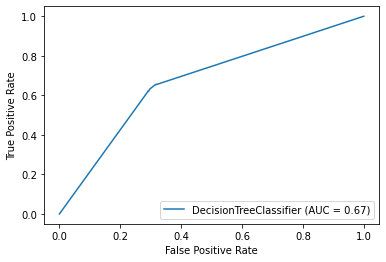

In [53]:
# Plotting the roc curve for the flu_dt model
plot_roc_curve(flu_dt, X_test_encoded_binary, y_test)

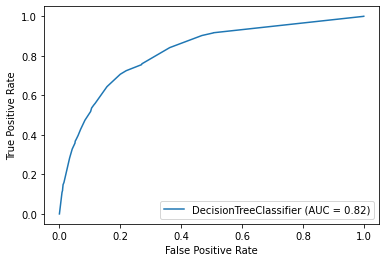

In [54]:
# Plotting the roc curve for the flu_dt_2 model
plot_roc_curve(flu_dt_2, X_test_encoded_binary, y_test)

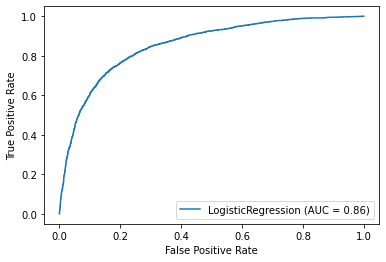

In [55]:
# Plotting the roc curve for the cred_model
plot_roc_curve(cred_model, X_test_encoded_binary, y_test)

In [63]:
# Getting the predictive probabilites of the flu_dt_2 model
y_prob_dt_2 = flu_dt_2.predict_proba(X_test_encoded_binary)
y_prob_dt_2[:5]

array([[0.22374429, 0.77625571],
       [0.65688488, 0.34311512],
       [0.14157303, 0.85842697],
       [0.45945946, 0.54054054],
       [0.14157303, 0.85842697]])

In [64]:
# Getting the roc auc score for the flu_dt_2 model
y_hat_dt_2 = y_prob_dt_2[:, 1]

roc_auc_score(y_test, y_hat_dt_2)

0.820263155657178

In [68]:
importance_scores = flu_dt_2.feature_importances_

# Create a list of (feature_name, importance_score) pairs
feature_importances = [(feature, score) for feature, score in zip(X_train_encoded_binary.columns, importance_scores)]

# Sort the features based on importance score (descending order)
feature_importances.sort(key=lambda x: x[1], reverse=True)

feature_names = []
# Print the important features
for feature, score in feature_importances:
    print(f"{feature}: {score}")
    feature_names.append(feature)

x0_5.0: 0.30333380163126267
doctor_recc_seasonal: 0.20240727647053705
x2_65+ Years: 0.0687340961752141
x1_4.0: 0.06107117304711181
x1_5.0: 0.04087080895965678
health_worker: 0.033608408907929585
x0_4.0: 0.024855294816237872
x1_2.0: 0.01905349579618994
x2_55 - 64 Years: 0.018286387745338913
x8_Rent: 0.016578743158667794
x6_Below Poverty: 0.015534881594546636
x3_College Graduate: 0.013999278572358597
x2_45 - 54 Years: 0.01181143488038827
behavioral_touch_face: 0.011030866433592208
x3_< 12 Years: 0.01052903971890368
x1_3.0: 0.009963760092310526
x10_1.0: 0.008294495892880616
chronic_med_condition: 0.007897496774113484
x4_White: 0.007866613139708867
x6_> $75,000: 0.00779012042529505
x11_1.0: 0.007324851598087696
x5_Male: 0.006696346882338741
x11_2.0: 0.005990962394582902
x4_Hispanic: 0.005900148229546207
x9_Not in Labor Force: 0.005862075788023694
behavioral_large_gatherings: 0.0057060782234153356
behavioral_avoidance: 0.005495079787213569
behavioral_outside_home: 0.005477597352044707
x3_So

In [114]:
# Getting the top 5 features
top_5_features = feature_names[:5]
top_5_features

['x0_5.0', 'doctor_recc_seasonal', 'x2_65+ Years', 'x1_4.0', 'x1_5.0']

In [115]:
# Creating new train and test dataframes using the top 5 features
X_train_important_features = X_train_encoded_binary[top_5_features]
X_test_important_features = X_test_encoded_binary[top_5_features]

In [131]:
# Creating a new model using the top 5 features
logreg_2 = LogisticRegression(random_state=1)
logreg_2.fit(X_train_important_features, y_train)

LogisticRegression(random_state=1)

In [128]:
# Run a cross validation on the new model
scores_simple_1 = cross_validate(
                    logreg_2, X_train_important_features, y_train, cv=5, 
                    return_train_score=True
)
print(f"""train scores: {scores_simple_1['train_score']},
      test scores: {scores_simple_1['test_score']}""")

train scores: [0.74769096 0.74962556 0.7480654  0.74650524 0.7490015 ],
      test scores: [0.75012481 0.74238642 0.74862706 0.7548677  0.74488268]


In [129]:
# Getting the accuracy score of the logreg_2 model
logreg_2.score(X_train_important_features, y_train)

0.7481777333999001

In [130]:
# Create a confusion matrix using the logreg_2 model
y_pred_1 = logreg_2.predict(X_test_important_features)
cm_2 = confusion_matrix(y_test, y_pred_1)
cm_2

array([[3022,  617],
       [ 967, 2071]], dtype=int64)

In [125]:
# Getting the precision score of the logreg_2 model
log_reg_prec_1 = precision_score(y_test, y_pred_1)
log_reg_prec_1

0.7704613095238095

In [136]:
# Creating new train and test dataframes with categories which have positive correlations to taking the vaccine
X_train_positive_features = X_train_encoded_binary[features_positive.index]
X_test_positive_features = X_test_encoded_binary[features_positive.index]

In [143]:
# Creating a new model using the positive correlation data
logreg_3 = LogisticRegression(random_state=1)
logreg_3.fit(X_train_positive_features, y_train)

LogisticRegression(random_state=1)

In [144]:
# Running a cross validation using the new logreg_3 model
scores_simple_2 = cross_validate(
                    logreg_3, X_train_positive_features, y_train, cv=5, 
                    return_train_score=True
)
print(f"""train scores: {scores_simple_2['train_score']},
      test scores: {scores_simple_2['test_score']}""")

train scores: [0.76934598 0.77040689 0.76578882 0.76597604 0.76909636],
      test scores: [0.76210684 0.75661508 0.77284074 0.77458812 0.76510235]


In [145]:
# Getting an accuracy score for the logreg_3 model
logreg_3.score(X_train_positive_features, y_train)

0.7679480778831752

In [141]:
# Creating a confusion matrix using the logreg_3 model
y_pred_2 = logreg_3.predict(X_test_positive_features)
cm_3 = confusion_matrix(y_test, y_pred_2)
cm_3

array([[2975,  664],
       [ 781, 2257]], dtype=int64)

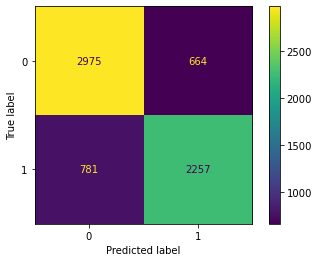

In [146]:
# Plot the confusion matrix
plot_confusion_matrix(logreg_3, X_test_positive_features, y_test)

In [148]:
# Print the precision score of the logreg_3 model
print(precision_score(y_test, y_pred_2))

0.7726805888394386
